<a href="https://colab.research.google.com/github/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/blob/main/Modulo_07_Introduccion_a_Python/BA_Ejercicio_complementario_plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

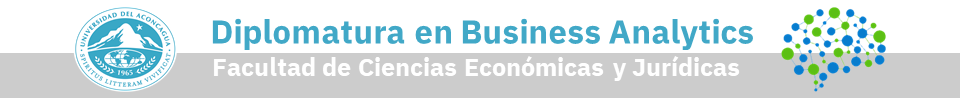

</center>

<center>
<font color="#41a8c7">
<h2><b>
Ejercicio complementario - Visualizaciones en Plotly

</font>
</center>

[Librería Ploty](https://plotly.com/python/)

Ejecutados los siguientes scripts...

In [1]:
URL = "https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/"
archivo = "Reporte_Cuentas_a_Cobrar.csv"
datos = URL + archivo
import pandas as pd
import numpy as np
cobros = pd.read_csv(datos)
cobros.drop(["DESCRIPCION","VENDEDOR","IMPORTEMONPPAL"], axis=1, inplace=True)
agrupacion_cobros = cobros.groupby("ORGANIZACION").sum()
agrupacion_cobros.insert(0,column="ORGANIZACION",value=agrupacion_cobros.index.values)
agrupacion_cobros.reset_index(drop=True, inplace=True)
agrupacion_cobros.rename(columns={"IMPORTEMONTRAN":"TOTAL"},inplace=True)
agrupacion_cobros

,ORGANIZACION,TOTAL
0,Algorte S.A.,259090.00
1,Berker S.R.L,5445.00
2,Campomas S.A.,72600.00
3,Consumidor Final,1500.00
4,Galardon S.A.,519549.80
5,Hernandez S.A.,571725.00
6,Horacio Aguirre,76230.00
7,Horizonte S.A.,640601.83
8,Ignition S.A.C.I,184525.00
9,Manganello S.R.L,550477.40


In [2]:
import pandas_datareader as data

def cotizacion(accion):
  a=data.DataReader(accion, start="2021-04-05", data_source="yahoo")
  accion=pd.DataFrame(a)
  accion.insert(1,column="Date",value=accion.index.values)
  accion.reset_index(drop=True, inplace=True)
  accion.insert(2,column="Day",value=pd.DatetimeIndex(accion["Date"]).day_name())
  accion["Pct_Change"] = accion.Close.pct_change()*100
  accion["Diff"] = accion.Close.diff()
  accion.drop(["Volume", "Adj Close"], axis=1, inplace=True)
  accion.dropna(how="any", inplace=True)
  accion.reset_index(drop=True, inplace=True)
  return accion

CRES = cotizacion("CRES.BA")
CRES["Name"] = "CRES"
BMA = cotizacion("BMA.BA")
BMA["Name"] = "BMA"
TECO2 = cotizacion("TECO2.BA")
TECO2["Name"] = "TECO2"

df = [CRES, BMA, TECO2]
CARTERA = pd.concat(df)

# Instalando la libreria

In [3]:
pip install dash

     |████████████████████████████████| 81kB 5.4MB/s 
     |████████████████████████████████| 1.0MB 12.3MB/s 
     |████████████████████████████████| 3.5MB 27.6MB/s 
     |████████████████████████████████| 92kB 13.3MB/s 
     |████████████████████████████████| 1.8MB 48.0MB/s 
     |████████████████████████████████| 358kB 38.4MB/s 
  Created wheel for dash: filename=dash-1.20.0-cp37-none-any.whl size=85834 sha256=b4d1217ed9dc9ec02f7ea031b5956801d29178aef5fa48eba0b8ebf6e55b7150
  Stored in directory: /root/.cache/pip/wheels/e6/33/41/ce361d0d1da277d2350f815b10f2ab1e331592d93ef2b07e29
  Created wheel for dash-renderer: filename=dash_renderer-1.9.1-cp37-none-any.whl size=1014875 sha256=81a24b6642e01febda4b5b345458ce9ee45c3dd7e8877d48ebda3eede78fafc7
  Stored in directory: /root/.cache/pip/wheels/03/a9/c5/dd5815c601b0ede164c223ffd7bafebde716ca57de06ef8aec
  Created wheel for dash-core-components: filename=dash_core_components-1.16.0-cp37-none-any.whl size=3540993 sha256=07d75ced68383c2efb014

# Activando el módulo Dash y Plotly Express

In [20]:
import dash
import plotly.express as px
import plotly.graph_objects as go

# Gráficos basicos

## Gráfico lineal simple

Ejemplo para las acciones CRES (Cresud S.A.) de la CARTERA

In [5]:
df = CARTERA.query("Name=='CRES'")
fig = px.line(df, x="Date", y="Close", title="Cresud S.A.")
fig.show()

**Realice el mismo gráfico para las acciones BMA (Banco Macro S.A.) de la CARTERA**

<a href="#respuesta01">Respuesta sugerida</a>

In [6]:
# Ejecute su script en tantas celdas de código que necesite

## Gráfico lineal con color por columna

Ejemplo para las acciones CRES (Cresud S.A.) y BMA (Banco Macro S.A.) de la CARTERA

In [7]:
df = CARTERA.query("Name!= 'TECO2'")
fig = px.line(df, x="Date", y="Close", color="Name", title="Cresud S.A. - Banco Macro S.A.")
fig.show()

**Realice el mismo gráfico para las acciones BMA (Banco Macro S.A.) y TECO2 (Telecom de Argentina S.A.) de la CARTERA**

**En otra celca realice un gráfico lineal con todas las acciones**

<a href="#respuesta02">Respuesta sugerida</a>

In [8]:
# Gráfico con BMA y TECO2

In [9]:
# Gráfico con CARTERA

## Gráfico de barras

Ejemplo para los totales de las cuentas a cobrar

In [10]:
fig = px.bar(agrupacion_cobros, x="ORGANIZACION", y="TOTAL", color="TOTAL", title="Cuentas a Cobrar")
fig.show()

**Realice el mismo gráfico para los totales de las cuentas a cobrar, pero que la leyenda identifique a cada cliente (ORGANIZACION)**

<a href="#respuesta03">Respuesta sugerida</a>

In [11]:
# Grafico de las cuentas a cobrar, con leyenda por cliente

## Gráfico de Cajas - Box Plots

Ejemplo para las acciones CRES (Cresud S.A.) de la CARTERA

In [12]:
df = CARTERA.query("Name=='CRES'")
fig = px.box(df, x="Name", y="Close", title="Cresud S.A.", points="all")
fig.show()

**Realice el mismo gráfico para las acciones CRES (Cresud S.A.) y TECO2 (Telecom de Argentina S.A.) de la CARTERA**

<a href="#respuesta04">Respuesta sugerida</a>

In [13]:
# Box Plots para CRES y TECO2

# Gráficos financieros

## Gráfico de Velas - Candlestick

In [22]:
CRES.head()

,High,Date,Day,Low,Open,Close,Pct_Change,Diff,Name
0,85.949997,2021-04-06,Tuesday,82.000000,82.199997,85.349998,5.435456,4.400002,CRES
1,88.699997,2021-04-07,Wednesday,83.099998,85.000000,83.599998,-2.050381,-1.750000,CRES
2,86.000000,2021-04-08,Thursday,83.599998,83.599998,85.150002,1.854071,1.550003,CRES
3,88.500000,2021-04-09,Friday,85.900002,87.849998,87.550003,2.818557,2.400002,CRES
4,90.949997,2021-04-12,Monday,87.099998,89.400002,88.949997,1.599079,1.399994,CRES


In [26]:
fig = go.Figure(data=[go.Candlestick(x=CRES["Date"],
                open=CRES["Open"],
                high=CRES["High"],
                low=CRES["Low"],
                close=CRES["Close"])])

fig.update_layout(title="Cresud S.A.")

fig.show()

**Realice el mismo gráfico para TECO2 (Telecom de Argentina S.A.)**

<a href="#respuesta05">Respuesta sugerida</a>

In [ ]:
# Grafico de velas para Telecom Argentina

## Gráfico OHLC - (Open, High, Low, Close)

In [29]:
fig = go.Figure(data=[go.Ohlc(x=BMA["Date"],
                open=BMA["Open"],
                high=BMA["High"],
                low=BMA["Low"],
                close=BMA["Close"])])

fig.update_layout(title="Banco Macro S.A.")

fig.show()

**Realice el mismo gráfico para CRES (Cresud S.A.)**

<a href="#respuesta06">Respuesta sugerida</a>

In [ ]:
# Grafico OHLC para CRES

# Respuestas

## Gráfico lineal simple

<a name="respuesta01"></a>

**Gráfico acciones BMA (Banco Macro S.A.) de la CARTERA**

In [14]:
df = CARTERA.query("Name=='BMA'")
fig = px.line(df, x="Date", y="Close", title="Banco Macro S.A.")
fig.show()

## Gráfico lineal con color por columna

<a name="respuesta02"></a>

**Gráfico acciones BMA (Banco Macro S.A.) y TECO2 (Telecom de Argentina S.A.) de la CARTERA**

In [15]:
df = CARTERA.query("Name!= 'CRES'")
fig = px.line(df, x="Date", y="Close", color="Name", title="Banco Macro S.A. - Telecom de Argentina S.A.")
fig.show()

In [16]:
df = CARTERA
fig = px.line(df, x="Date", y="Close", color="Name", title="Cartera de acciones")
fig.show()

## Gráfico de barras

<a name="respuesta03"></a>

**Gráfico totales de las cuentas a cobrar, con leyenda de los clientes**

In [17]:
fig = px.bar(agrupacion_cobros, x="ORGANIZACION", y="TOTAL", color="ORGANIZACION", title="Cuentas a Cobrar")
fig.show()

## Gráfico de Cajas - Box Plots

<a name="respuesta04"></a>

**Box Plots para CRES (Cresud S.A.) y TECO2 (Telecom de Argentina S.A.)**

In [18]:
df = CARTERA.query("Name!='BMA'")
fig = px.box(df, x="Name", y="Close", title="Cresud S.A. - Telecom de Argentina S.A.", points="all", color="Name")
fig.show()

## Gráfico de Velas - Candlestick

<a name="respuesta05"></a>

**Grafico de velas para TECO2 (Telecom de Argentina S.A.)**

In [27]:
fig = go.Figure(data=[go.Candlestick(x=TECO2["Date"],
                open=TECO2["Open"],
                high=TECO2["High"],
                low=TECO2["Low"],
                close=TECO2["Close"])])

fig.update_layout(title="Telecom de Argentina S.A.")

fig.show()

## Gráfico OHLC - (Open, High, Low, Close)

<a name="respuesta06"></a>

**Grafico OHLC para CRES**

In [30]:
fig = go.Figure(data=[go.Ohlc(x=CRES["Date"],
                open=CRES["Open"],
                high=CRES["High"],
                low=CRES["Low"],
                close=CRES["Close"])])

fig.update_layout(title="Cresud S.A.")

fig.show()